In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
with  open("survey_exchange_num_strategy.out", 'r') as f:
    df = pd.DataFrame([eval(line) for line in f if line.startswith("{'dynamic':")]).dropna()

#df = pd.read_csv("survey_exchange_num_strategy.csv")
df["optim_per_iter"] = df["optim_times"] / df["n_iters"]
df["type"] = df.apply(
    lambda x: ("dynamic_" if x["dynamic"] else "static_")
    + x["splicing_type"]
    + ("_greedy_" if x["greedy"] else "_exact_")
    + str(x['k_max']),
    axis=1,
)
df = df[df["time"] < 100]

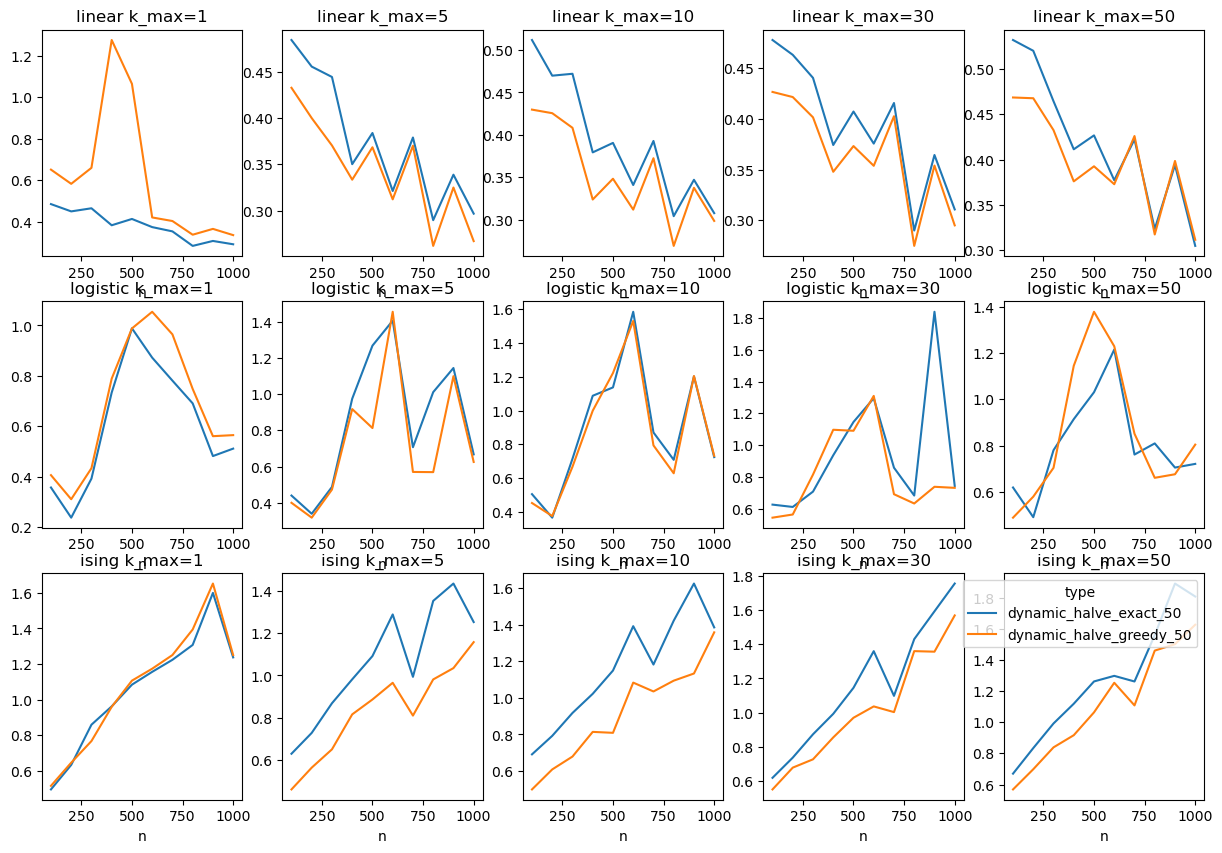

In [9]:
models = ["linear", "logistic", "ising"]
k_maxs = [1, 5, 10, 30, 50]
fig, axes = plt.subplots(len(models), len(k_maxs), figsize=(15, 10))
for i, model in enumerate(models):
    for j, k_max in enumerate(k_maxs):
            df[
                (df.model == model) & (df.dynamic == True) & (df.splicing_type == "halve") & (df.k_max == k_max)
            ].groupby(["n", "type"])["time"].mean().unstack(level=1).plot(
                ax=axes[i, j],
                title=model + " k_max=" + str(k_max),
            )
            axes[i, j].get_legend().set_visible(False)
axes[-1, -1].get_legend().set_visible(True)

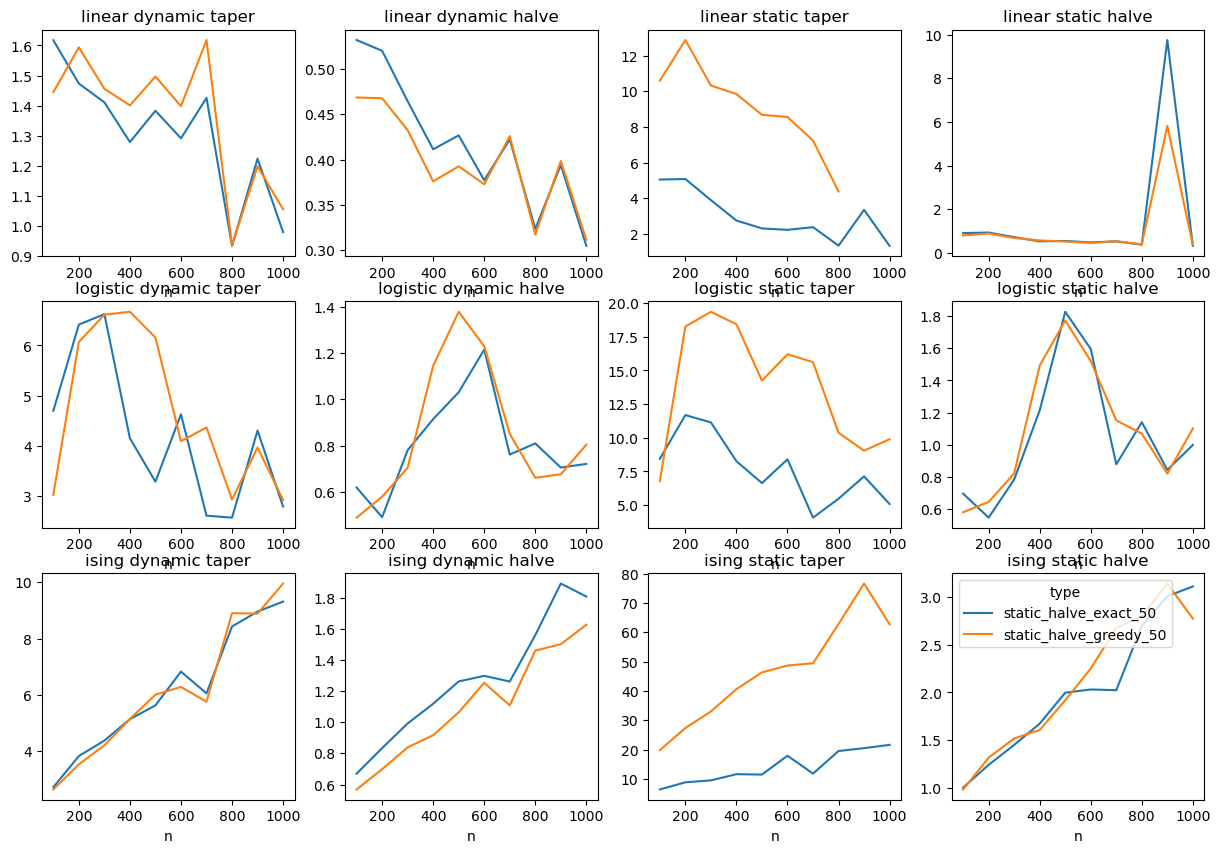

In [7]:
models = ["linear", "logistic", "ising"]
metrics = ["time", "accuracy", "n_iters", "optim_per_iter"]
fig, axes = plt.subplots(len(models), len(metrics), figsize=(15, 10))
for i, model in enumerate(models):
    for j, dynamic in enumerate([True, False]):
        for k, splicing_type in enumerate(["taper", "halve"]):
            df[
                (df.model == model) & (df.dynamic == dynamic) & (df.splicing_type == splicing_type) 
                & (df.k_max == 50)
            ].groupby(["n", "type"])["time"].mean().unstack(level=1).plot(
                ax=axes[i, j*2+k],
                title=model + (" dynamic" if dynamic else " static") + " " + splicing_type,
            )
            axes[i, j*2+k].get_legend().set_visible(False)
axes[-1, -1].get_legend().set_visible(True)

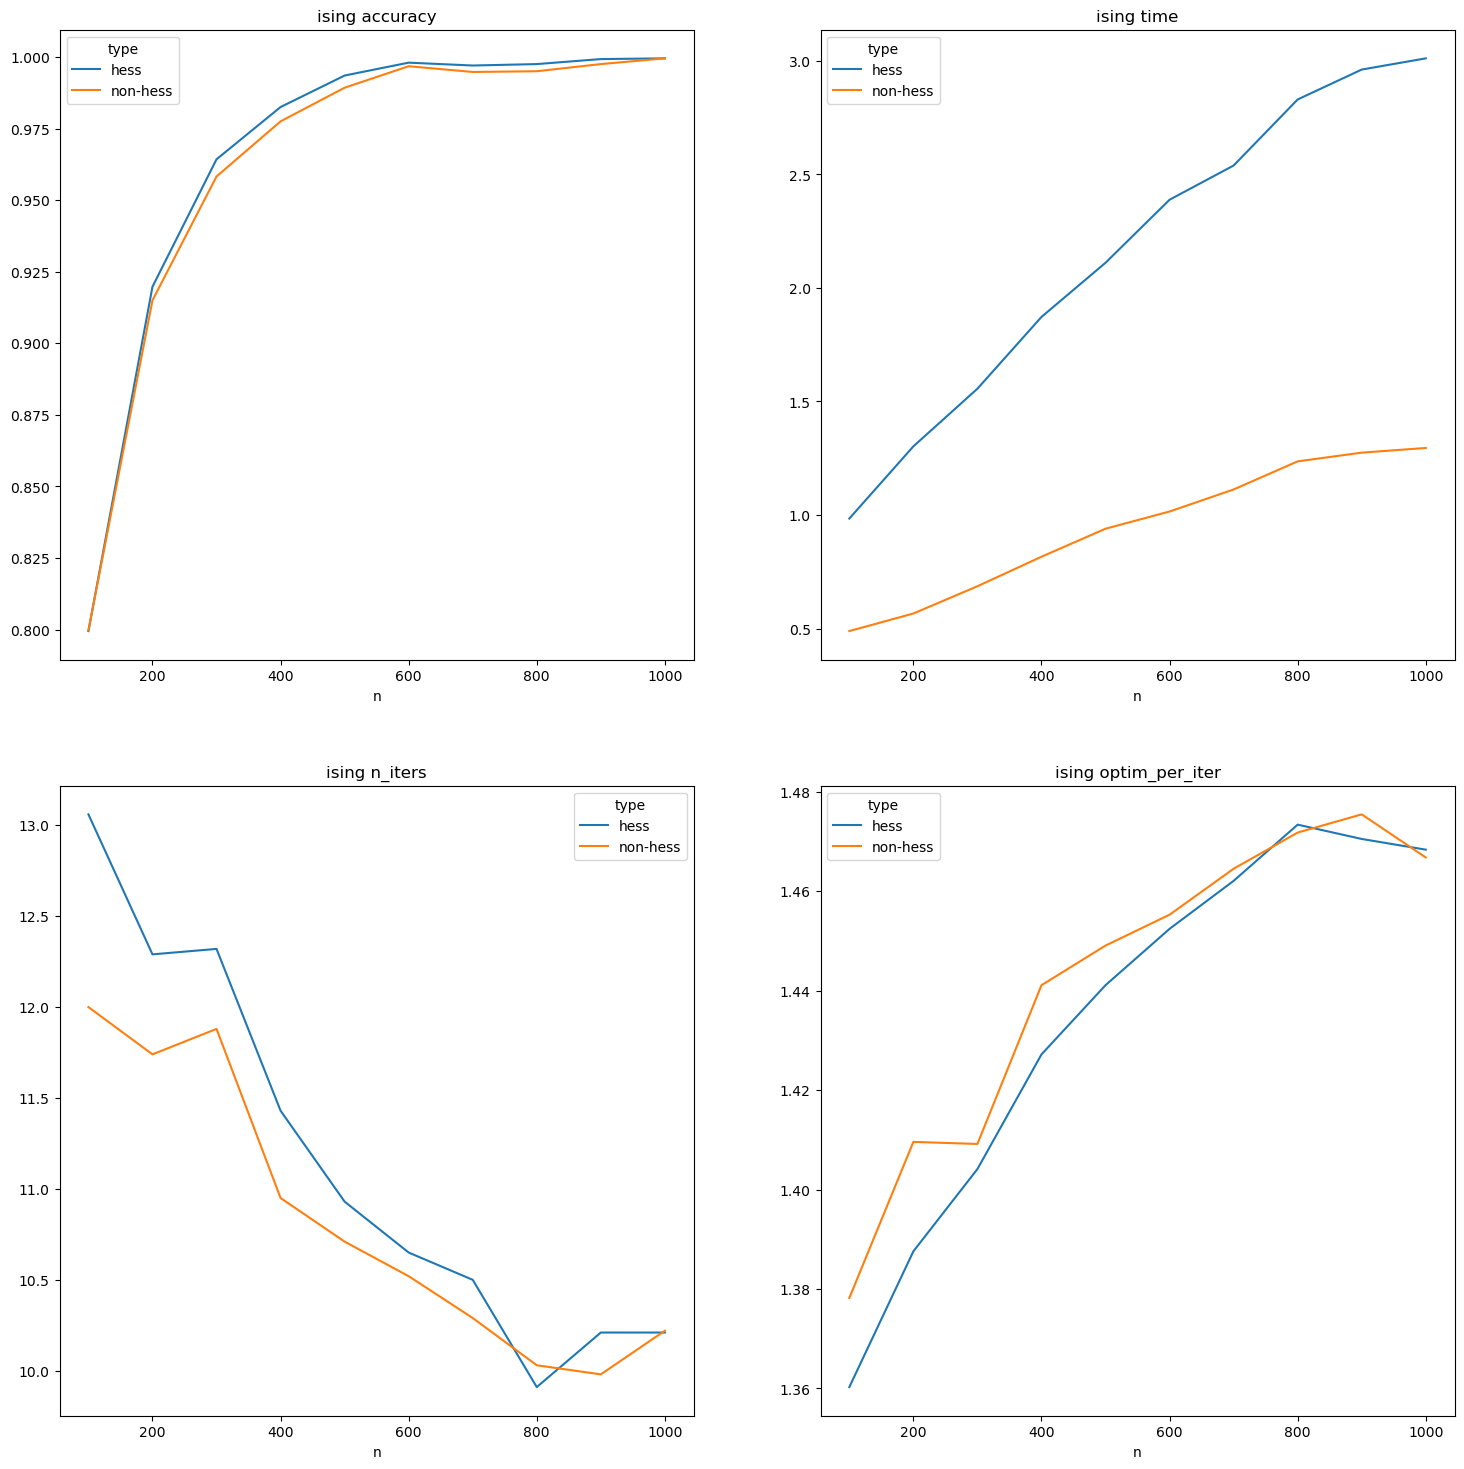

In [2]:
df = pd.read_csv("survey_hess_ising.csv").dropna()

df['optim_per_iter'] = df['optim_times'] / df['n_iters']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 18))
for j, metric in enumerate(["accuracy", "time", "n_iters", "optim_per_iter"]):
    df[df.model == "ising"].groupby(["n", "type"])[metric].mean().unstack(level=1).plot(
        ax=axes[j//2,j%2], title="ising " + metric,
    )

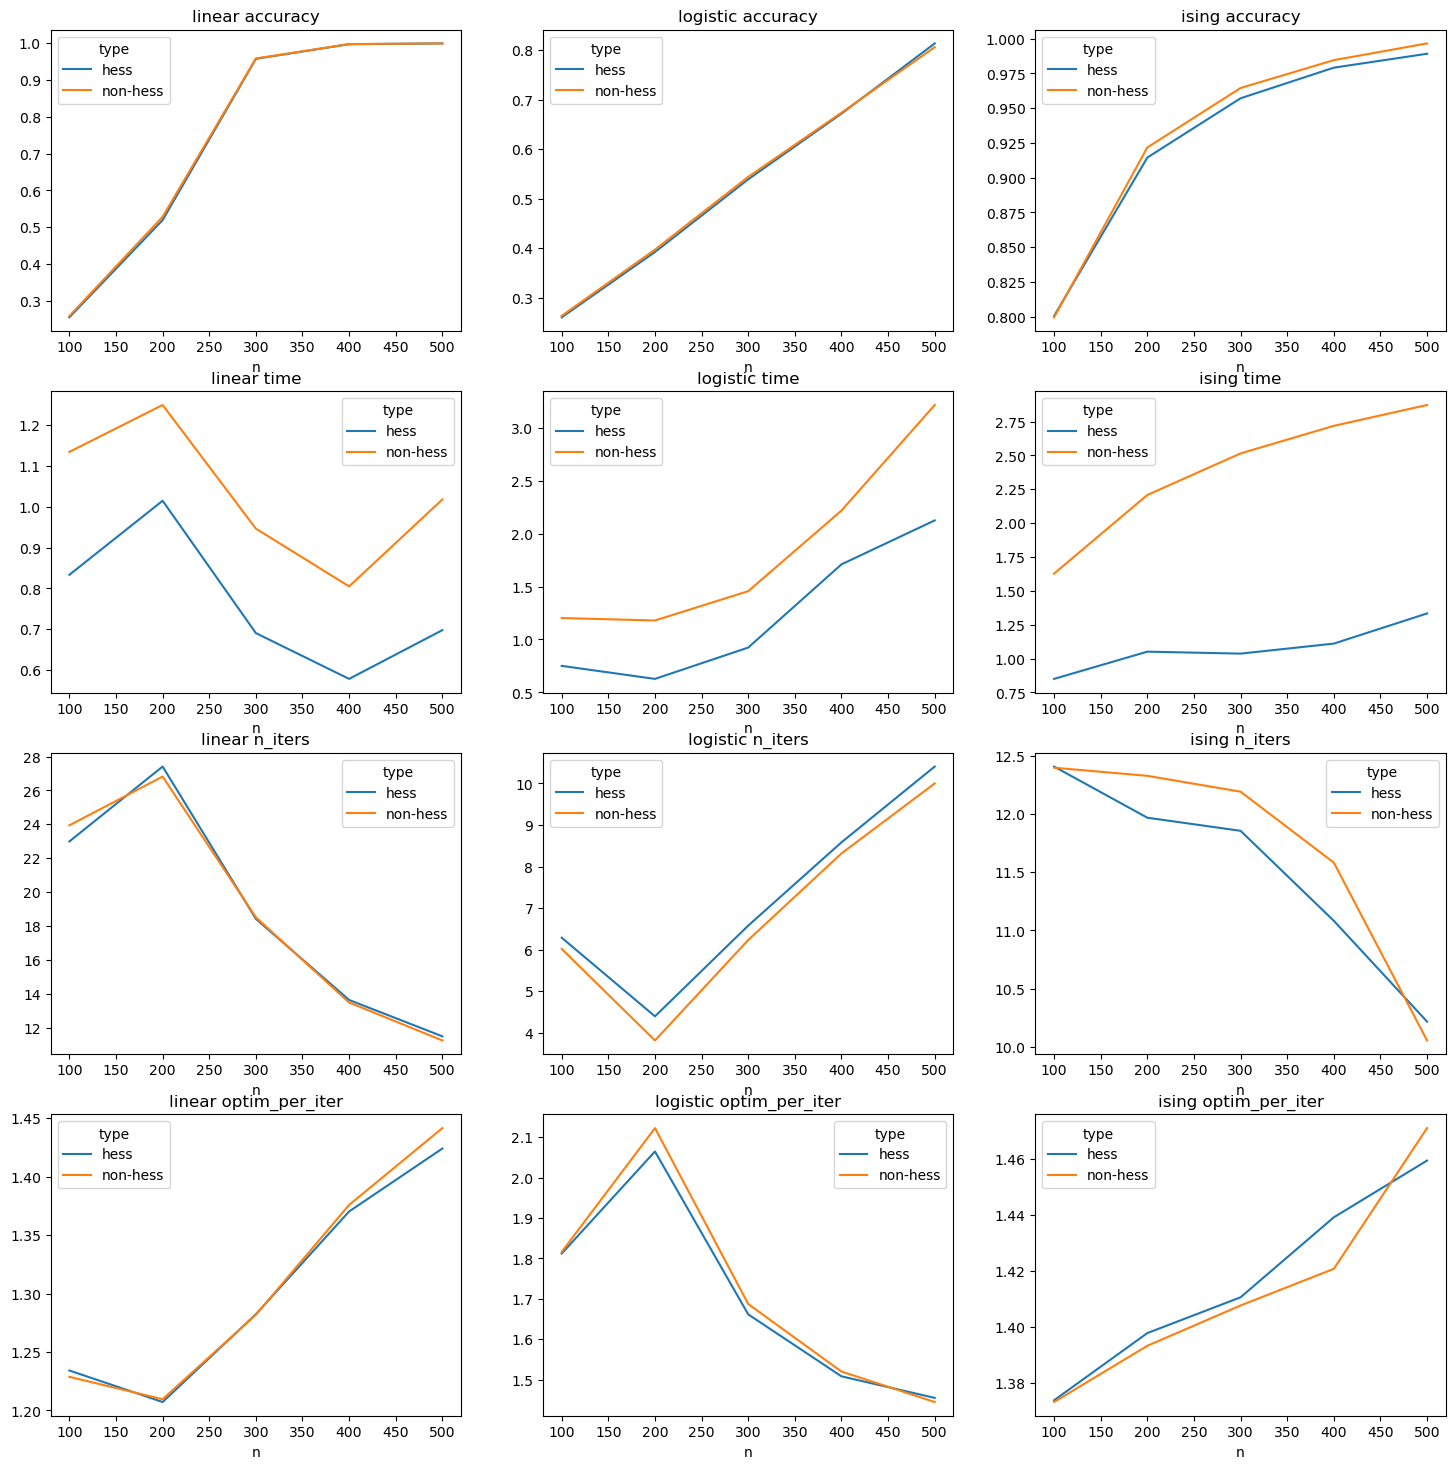

In [6]:
with  open("survey_hess.out", 'r') as f:
    df = pd.DataFrame([eval(line) for line in f if line.startswith("{'type': '")])

df['optim_per_iter'] = df['optim_times'] / df['n_iters']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))
for j, metric in enumerate(["accuracy", "time", "n_iters", "optim_per_iter"]):
    df[df.model == "linear"].groupby(["n", "type"])[metric].mean().unstack(level=1).plot(
        ax=axes[j,0], title="linear " + metric,
    )
    df[df.model == "logistic"].groupby(["n", "type"])[metric].mean().unstack(level=1).plot(
        ax=axes[j,1], title="logistic " + metric,
    )
    df[df.model == "ising"].groupby(["n", "type"])[metric].mean().unstack(level=1).plot(
        ax=axes[j,2], title="ising " + metric,
    )

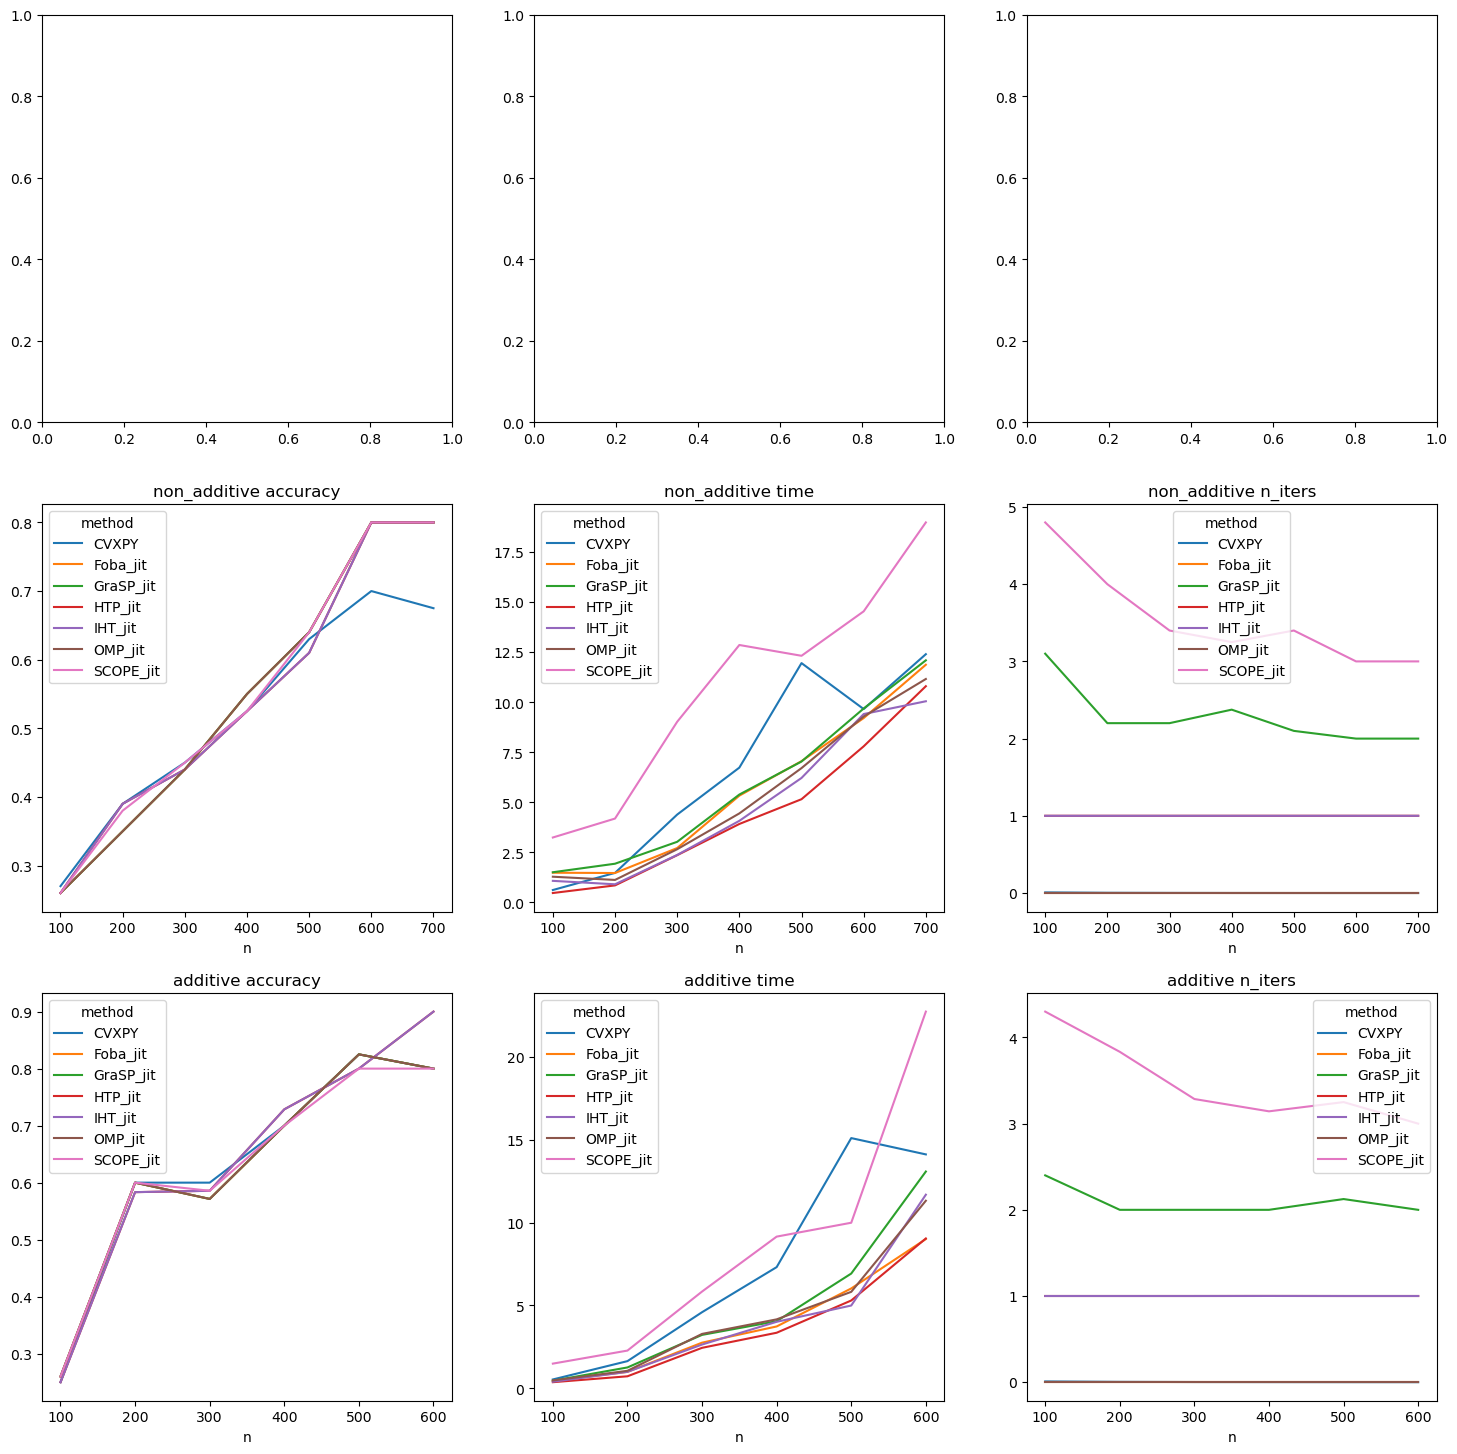

In [4]:
with  open(r"non_linear.out", 'r') as f:
    df = pd.DataFrame([eval(line) for line in f if line.startswith("{'method': '")])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
for j, metric in enumerate(["accuracy", "time", "n_iters"]):
    df[df.model == "non_additive"].groupby(["method", "n"])[metric].mean().unstack(level=0).plot(
        ax=axes[1,j], title="non_additive " + metric,
    )
    df[df.model == "additive"].groupby(["method", "n"])[metric].mean().unstack(level=0).plot(
        ax=axes[2,j], title="additive " + metric,
    )



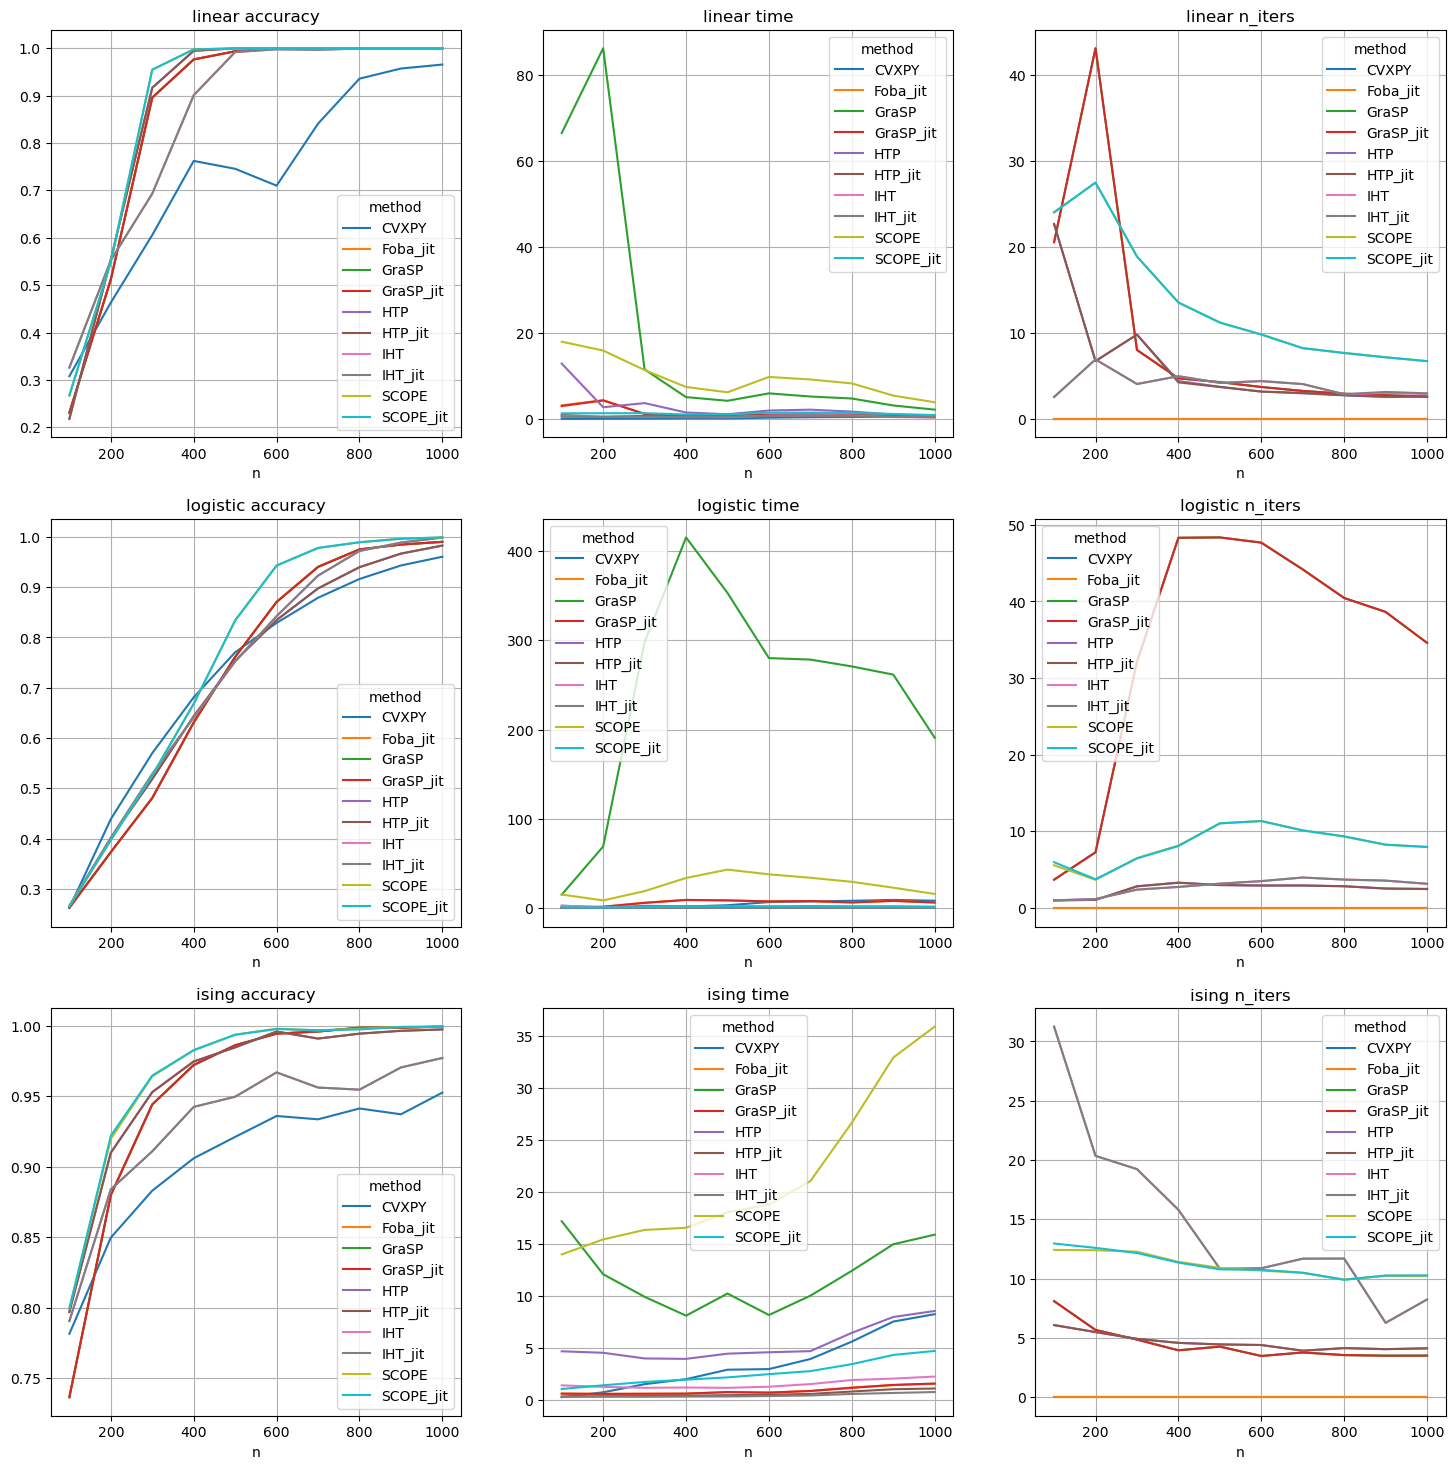

In [2]:
df = pd.read_csv("linear-logistic-ising-1.csv").dropna()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
for i, model in enumerate(["linear", "logistic", "ising"]):
    for j, metric in enumerate(["accuracy", "time", "n_iters"]):
        df[df["model"] == model].groupby(['n', 'method'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
        )

<Axes: title={'center': 'ising_n_iters'}, xlabel='n'>

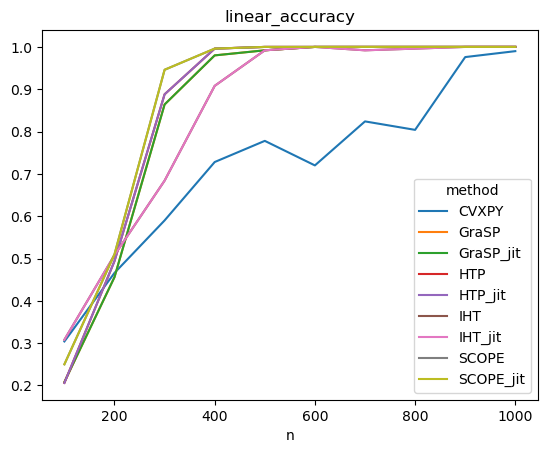

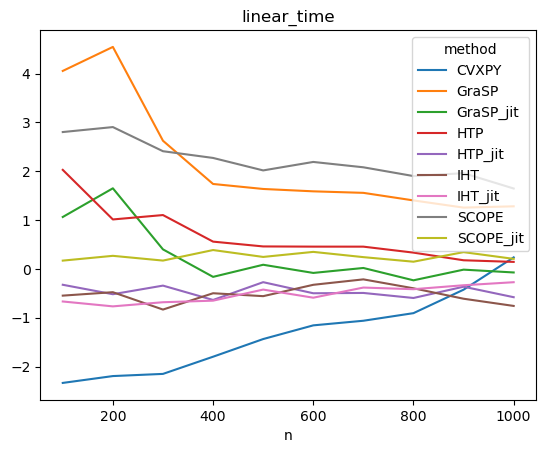

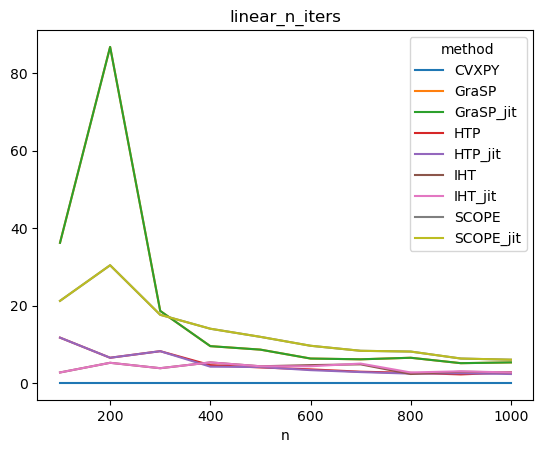

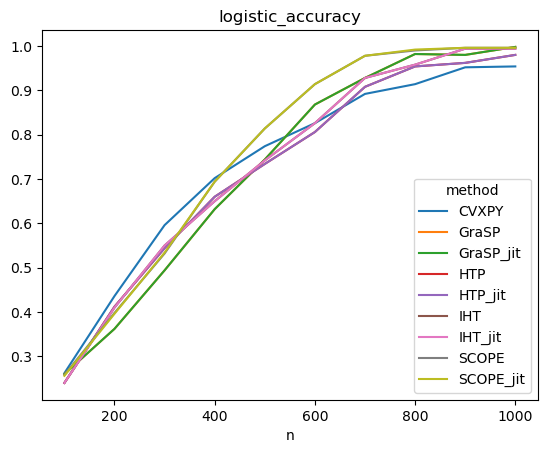

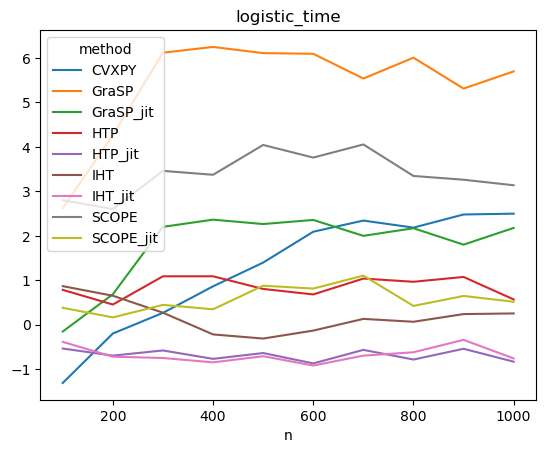

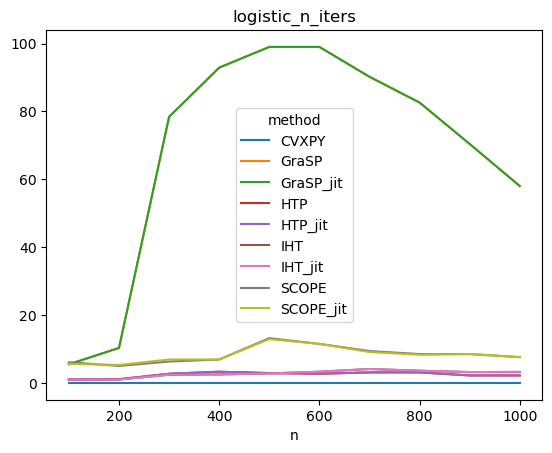

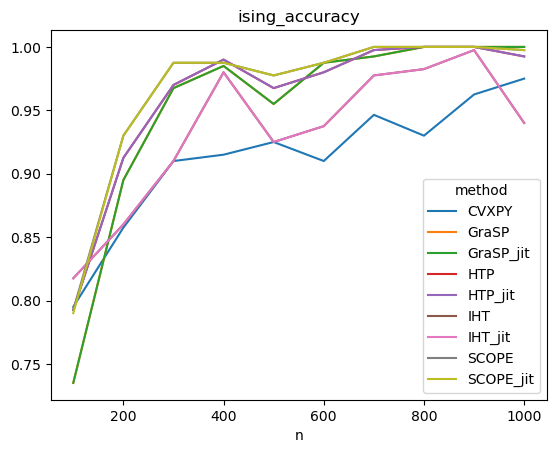

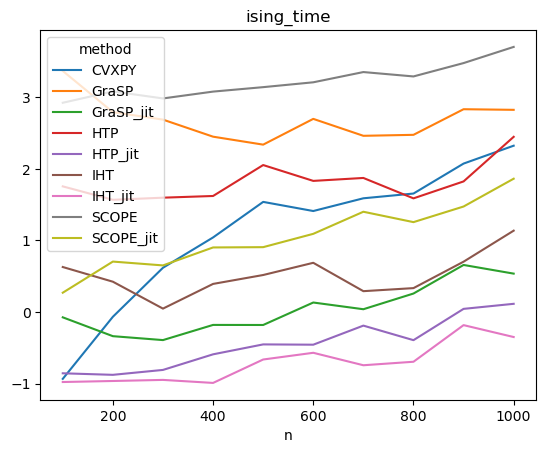

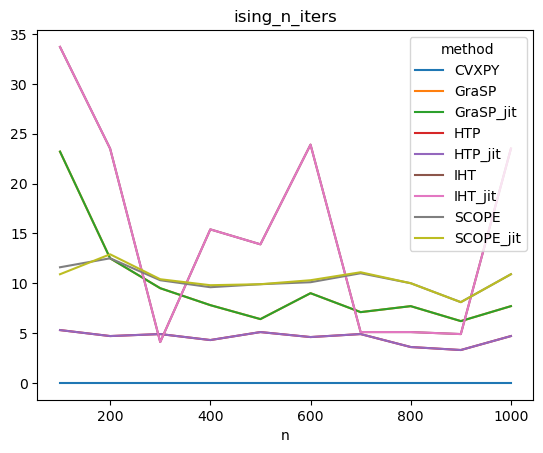

In [4]:
df = pd.read_csv('linear-logistic-ising.csv').dropna()
linear = df.loc[df.model == 'linear']
logistic = df.loc[df.model == 'logistic']
ising = df.loc[df.model == 'ising']

linear_accuracy = linear.groupby(['n', 'method'])['accuracy'].mean().unstack()
linear_time = linear.groupby(['n', 'method'])['time'].mean().apply(lambda x: np.log(x)).unstack()
linear_n_iters = linear.groupby(['n', 'method'])['n_iters'].mean().unstack()

logistic_accuracy = logistic.groupby(['n', 'method'])['accuracy'].mean().unstack()
logistic_time = logistic.groupby(['n', 'method'])['time'].mean().apply(lambda x: np.log(x)).unstack()
logistic_n_iters = logistic.groupby(['n', 'method'])['n_iters'].mean().unstack()

ising_accuracy = ising.groupby(['n', 'method'])['accuracy'].mean().unstack()
ising_time = ising.groupby(['n', 'method'])['time'].mean().apply(lambda x: np.log(x)).unstack()
ising_n_iters = ising.groupby(['n', 'method'])['n_iters'].mean().unstack()

linear_accuracy.plot(kind='line', title='linear_accuracy')
linear_time.plot(kind='line', title='linear_time')
linear_n_iters.plot(kind='line', title='linear_n_iters')
logistic_accuracy.plot(kind='line', title='logistic_accuracy')
logistic_time.plot(kind='line', title='logistic_time')
logistic_n_iters.plot(kind='line', title='logistic_n_iters')
ising_accuracy.plot(kind='line', title='ising_accuracy')
ising_time.plot(kind='line', title='ising_time')
ising_n_iters.plot(kind='line', title='ising_n_iters')